In [16]:
import pandas as pd
import numpy as np
from datetime import datetime

import fxcmpy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [ ]:
class MomentunTrader(opy.Streamer):
    
    def __init__(self, momentum, *args, **kwargs):
        opy.Streamer.__init__(self, *args, **kwargs)
        self.ticks = 0
        self.position = 0
        self.df = pd.DataFrame()
        self.momentum = momentum
        self.units = 100000
    
    def create_order(self, side, units):
        order = con.create_market_buy_order(symbol, amount)

In [32]:
con = fxcmpy.fxcmpy(config_file = 'fxcm.cfg')
tf = 'H1'
n = 100
symbol = 'USD/JPY'

In [33]:
df = con.get_candles(symbol, period=tf, number=n)

In [34]:
#df['returns'] = np.log(df['askclose'] / df['askclose'].shift(1))
df['pct_change'] = df['askclose'].pct_change()

In [35]:
df.tail()

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,returns,pct_change
date,,,,,,,,,,,
2019-02-26 23:00:00,110.558,110.547,110.579,110.519,110.574,110.561,110.593,110.533,5717,-0.000109,-0.000109
2019-02-27 00:00:00,110.547,110.529,110.575,110.507,110.561,110.542,110.588,110.521,4832,-0.000172,-0.000172
2019-02-27 01:00:00,110.529,110.597,110.612,110.527,110.542,110.611,110.624,110.541,11939,0.000624,0.000624
2019-02-27 02:00:00,110.596,110.572,110.598,110.547,110.610,110.585,110.611,110.558,9567,-0.000235,-0.000235
2019-02-27 03:00:00,110.573,110.595,110.601,110.554,110.586,110.608,110.614,110.567,6416,0.000208,0.000208


In [10]:
df['pct_change'].rolling(15).mean().tail()

date
2019-02-26 23:00:00    0.000224
2019-02-27 00:00:00    0.000138
2019-02-27 01:00:00    0.000129
2019-02-27 02:00:00    0.000103
2019-02-27 03:00:00    0.000091
Name: pct_change, dtype: float64

In [9]:
np.sign(df['pct_change'].rolling(15).mean()).tail()

date
2019-02-26 23:00:00    1.0
2019-02-27 00:00:00    1.0
2019-02-27 01:00:00    1.0
2019-02-27 02:00:00    1.0
2019-02-27 03:00:00    1.0
Name: pct_change, dtype: float64

In [36]:
cols = []
day_list = [15, 30, 60, 120]
for i in day_list:
    col = 'position_%s' % i
    df[col] = np.sign(df['pct_change'].rolling(i).mean())
    cols.append(col)
cols

['position_15', 'position_30', 'position_60', 'position_120']

In [14]:
df.tail()

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,returns,pct_change,position_15,position_30,position_60,position_120
date,,,,,,,,,,,,,,,
2019-02-26 23:00:00,1.13922,1.13925,1.13936,1.13899,1.13944,1.13937,1.13949,1.13912,2184,-0.000061,-0.000061,1.0,1.0,1.0,NaN
2019-02-27 00:00:00,1.13924,1.13901,1.13955,1.13876,1.13936,1.13914,1.13964,1.13887,4700,-0.000202,-0.000202,1.0,1.0,1.0,NaN
2019-02-27 01:00:00,1.13902,1.13850,1.13925,1.13812,1.13915,1.13863,1.13938,1.13824,8237,-0.000448,-0.000448,1.0,1.0,1.0,NaN
2019-02-27 02:00:00,1.13849,1.13810,1.13867,1.13808,1.13862,1.13824,1.13879,1.13819,2455,-0.000343,-0.000343,1.0,1.0,1.0,NaN
2019-02-27 03:00:00,1.13811,1.13790,1.13814,1.13768,1.13824,1.13801,1.13827,1.13781,6974,-0.000202,-0.000202,1.0,1.0,1.0,NaN


In [37]:
strats = ['pct_change']
strats

['pct_change']

In [42]:
for col in cols:
    strat = 'strategy_%s' % col.split('_')[1]
    df[strat] = df[col].shift(1) * df['pct_change']
    strats.append(strat)
#df[strats].dropna().cumsum().apply(np.exp).plot()
df.tail()

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,returns,pct_change,position_15,position_30,position_60,position_120,strategy_15,strategy_30,strategy_60,strategy_120
date,,,,,,,,,,,,,,,,,,,
2019-02-26 23:00:00,110.558,110.547,110.579,110.519,110.574,110.561,110.593,110.533,5717,-0.000109,-0.000109,-1.0,-1.0,-1.0,NaN,0.000109,0.000109,0.000109,NaN
2019-02-27 00:00:00,110.547,110.529,110.575,110.507,110.561,110.542,110.588,110.521,4832,-0.000172,-0.000172,-1.0,-1.0,-1.0,NaN,0.000172,0.000172,0.000172,NaN
2019-02-27 01:00:00,110.529,110.597,110.612,110.527,110.542,110.611,110.624,110.541,11939,0.000624,0.000624,-1.0,-1.0,-1.0,NaN,-0.000624,-0.000624,-0.000624,NaN
2019-02-27 02:00:00,110.596,110.572,110.598,110.547,110.610,110.585,110.611,110.558,9567,-0.000235,-0.000235,-1.0,-1.0,-1.0,NaN,0.000235,0.000235,0.000235,NaN
2019-02-27 03:00:00,110.573,110.595,110.601,110.554,110.586,110.608,110.614,110.567,6416,0.000208,0.000208,-1.0,-1.0,-1.0,NaN,-0.000208,-0.000208,-0.000208,NaN


In [39]:
df[strats].dropna()

,pct_change,strategy_15,strategy_30,strategy_60,strategy_120
date,,,,,


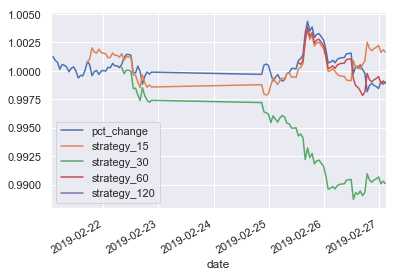

In [40]:
df[strats].cumsum().apply(np.exp).plot()

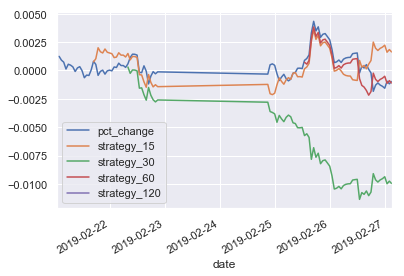

In [41]:
df[strats].cumsum().plot()